<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Classification_Decision_Tree_%26Random_forest_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Using Decision Tree Classifier
-------------------------------------------------

**Dataset** - [Adult Income Dataset](https://github.com/teddcp/Machine-Learning-/blob/master/data-files/AdultIncome.csv)


## 1. importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Analyzing data

In [2]:
# Uploading the file
from google.colab import files
csv=files.upload()

Saving AdultIncome.csv to AdultIncome.csv


In [3]:
data=pd.read_csv('/content/AdultIncome.csv')
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [4]:
data.IncomeClass[0],data.IncomeClass[3]

(' <=50K', ' >50K')

In [5]:
data.IncomeClass= data['IncomeClass'].map( {' <=50K' : 0 , ' >50K' : 1} )
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,0
1,28,Private,Bachelors,Married,Black,Female,40,0
2,37,Private,Masters,Married,White,Female,40,0
3,31,Private,Masters,Never-married,White,Female,50,1
4,42,Private,Bachelors,Married,White,Male,40,1


In [6]:
data.info()   # 4 categorical columns and 3 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19787 non-null  int64 
 1   wc              19787 non-null  object
 2   education       19787 non-null  object
 3   marital status  19787 non-null  object
 4   race            19787 non-null  object
 5   gender          19787 non-null  object
 6   hours per week  19787 non-null  int64 
 7   IncomeClass     19787 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


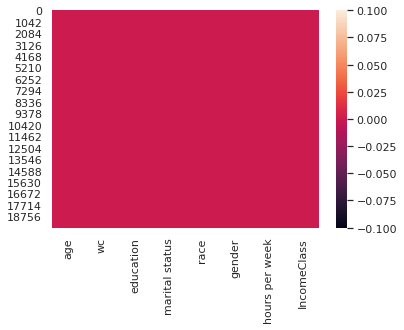

In [7]:
sns.heatmap(data.isnull())   # No Null value

## 3. Visualizing the data

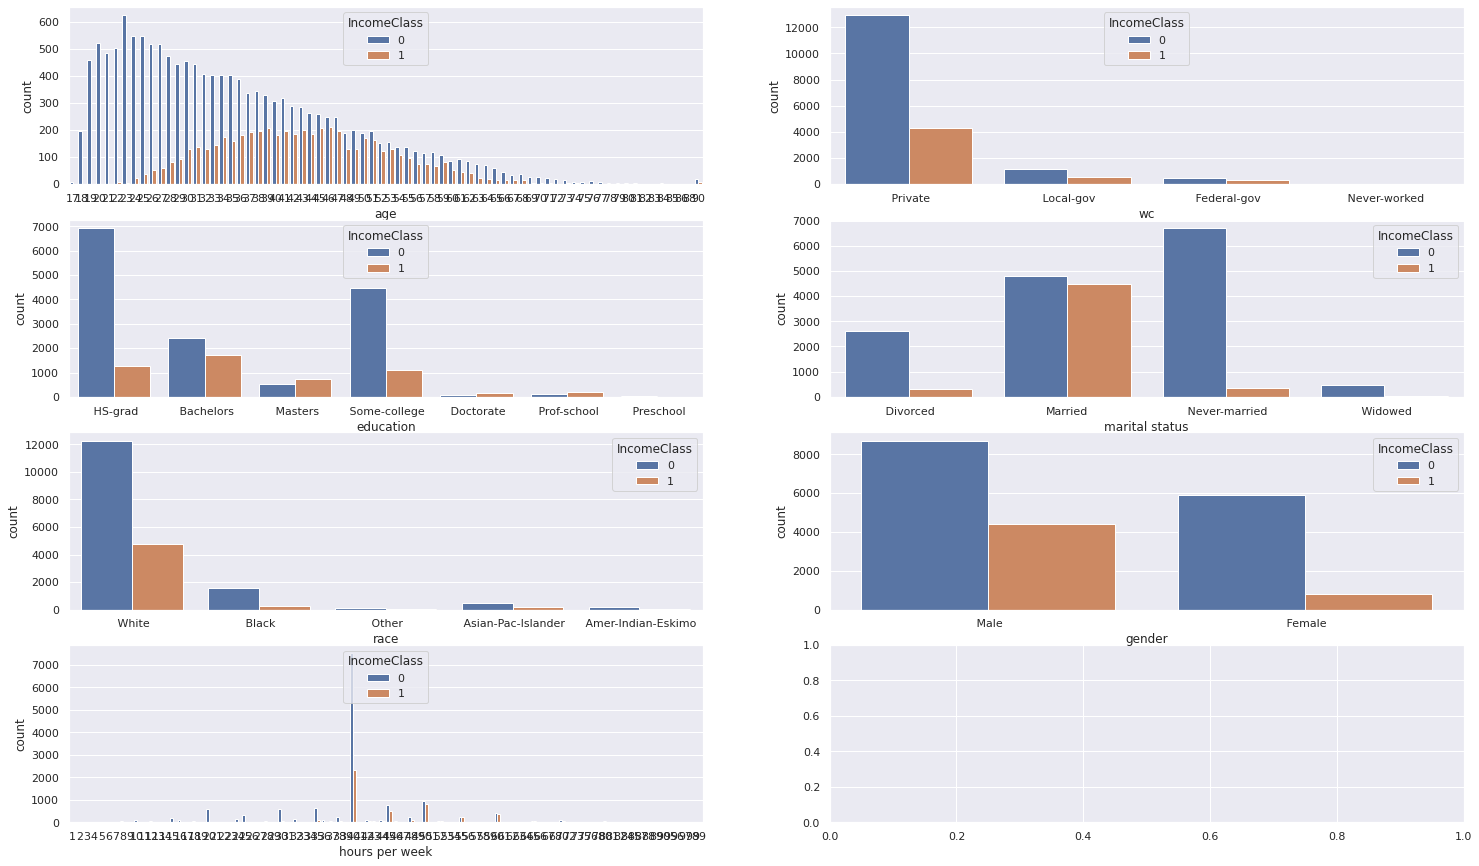

In [8]:
fig,arr=plt.subplots(4,2, figsize=(25,15))
k=1

for i in data.columns[:-1]:
  plt.subplot(4,2,k)
  sns.countplot(x=i,data=data,hue='IncomeClass')
  k+=1

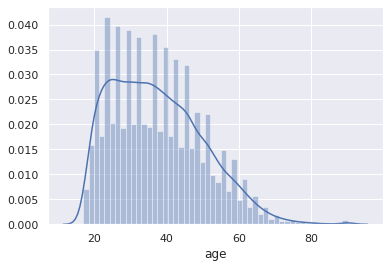

In [9]:
sns.distplot(data['age'])

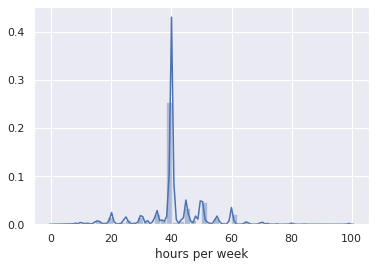

In [10]:
sns.distplot(data['hours per week'])

## 4. Splitting the data for training and testing


In [0]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test,y_train,y_test= tts(x,y,random_state=42,test_size=0.3,stratify=y)

## 5. Making the pipeline

In [0]:
from sklearn.pipeline  import make_pipeline as mp
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer as ct
from sklearn.tree import DecisionTreeClassifier as dt

In [15]:
data.columns

Index(['age', 'wc', 'education', 'marital status', 'race', 'gender',
       'hours per week', 'IncomeClass'],
      dtype='object')

In [0]:
preprocess= ct(transformers=[ ('encoder',ohe(),['wc','education','marital status','race','gender'])] ,
                remainder='passthrough'
               )

In [0]:
pipe=mp( preprocess, dt(random_state=42))

## 6. Training 

In [18]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['wc', 'education',
                                                   'marital status', 'race',
                                                   'gender'])],
                                   verbose=False)),
      

In [19]:
pipe.named_steps['decisiontreeclassifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## 7. Predicting

In [20]:
pred=pipe.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

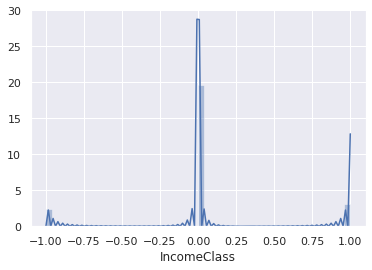

In [21]:
sns.distplot(y_test-pred)

## 8. Accuracy Evaluation

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

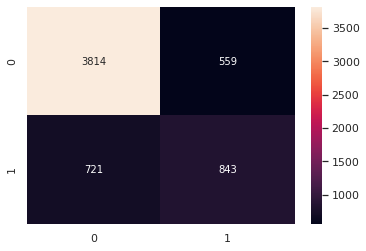

In [23]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

In [24]:
accuracy_score(y_test,pred)  # 78% Accuracy

0.7844028970860704

**Note** 
-------------
 
 So far we have achieved ***`78% accuracy and now with grid search`*** we will try to improve the accuracy

## GRIDSEARCHCV
-------------------------------------------------------

In [0]:
from sklearn.model_selection import GridSearchCV as gsc

In [0]:
preprocess= ct(transformers=[ ('encoder',ohe(),['wc','education','marital status','race','gender'])] ,
                remainder='passthrough'
               )

In [0]:
pipe=mp( preprocess, dt(random_state=42))

In [0]:
param_grid={ 'decisiontreeclassifier__criterion': ['gini','entropy'] , 
             'decisiontreeclassifier__max_depth': np.arange(2,10),
             'decisiontreeclassifier__max_features': ['auto','sqrt','log'],
             'decisiontreeclassifier__ccp_alpha' : [0.1,0.001,0.001,0.2,0.5,0.8,1,2,4,3,5,6],
             'decisiontreeclassifier__min_samples_leaf' : np.arange(3,10)
           }

In [0]:
model_gsc=gsc(pipe,param_grid=param_grid,scoring='accuracy',n_jobs=-1, cv=5)

In [30]:
model_gsc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                       

In [0]:
pred=model_gsc.predict(x_test)

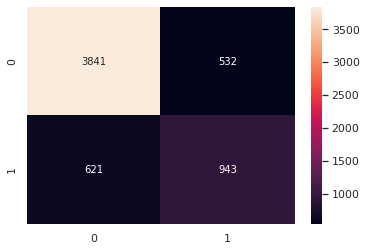

In [32]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

In [33]:
accuracy_score(y_test,pred)  # 80% Accuracy

0.8057941721408118

**Note**

Using GridSearch, we have improved the **`accuracy from 78% to 80% `**.


#  Using Random Forest Classifier
-------------------------------------------------

## 1. Making the pipeline

In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [0]:
preprocess= ct(transformers=[ ('encoder',ohe(),['wc','education','marital status','race','gender'])] ,
                remainder='passthrough'
               )

In [0]:
pipe=mp( preprocess, rfc(random_state=42,n_estimators=200) )

## 6. Training 

In [37]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['wc', 'education',
                                                   'marital status', 'race',
                                                   'gender'])],
                                   verbose=False)),...
   

## 7. Predicting

In [0]:
pred=pipe.predict(x_test)

## 8. Accuracy Evaluation

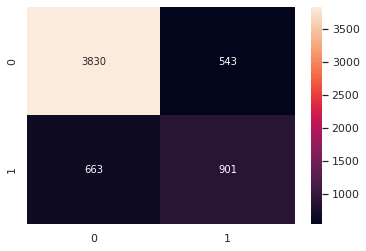

In [39]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

In [40]:
accuracy_score(y_test,pred)  # 79% Accuracy while the accuracy with Decsion Tree without gridsearch is 78%

0.7968671045982819

## Doing GridSearch with Random Forest

In [0]:
preprocess= ct(transformers=[ ('encoder',ohe(),['wc','education','marital status','race','gender'])] ,
                remainder='passthrough'
               )

In [0]:
pipe=mp( preprocess, rfc(random_state=42))

In [43]:
pipe.get_params().keys() # to get all the attribute names

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__encoder', 'columntransformer__encoder__categories', 'columntransformer__encoder__drop', 'columntransformer__encoder__dtype', 'columntransformer__encoder__handle_unknown', 'columntransformer__encoder__sparse', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min

In [0]:
param_grid={ 'randomforestclassifier__max_depth': np.arange(2,10),
             'randomforestclassifier__max_features': ['auto','sqrt','log'],
             'randomforestclassifier__ccp_alpha' : [0.1,0.001,0.001,0.2,0.5,0.8,1,2,4,3,5,6],
            #  'randomforestclassifier__min_samples_leaf' : np.arange(3,10),
             'randomforestclassifier__n_estimators' : np.array([100,150,200,250,300,400])
           }

In [0]:
model_gsc=gsc(pipe,param_grid=param_grid,scoring='accuracy',n_jobs=-1, cv=5)

In [46]:
model_gsc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                       

In [0]:
pred=model_gsc.predict(x_test)

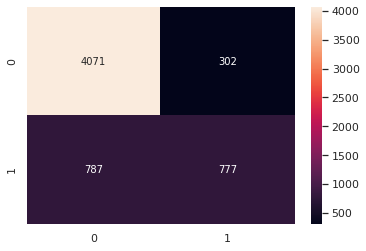

In [49]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')

In [50]:
accuracy_score(y_test,pred)  # 81% Accuracy : IMPROVED

0.8165740272865083